<a href="https://colab.research.google.com/github/erickvaldezsallagos/EDPII/blob/main/Diferencias_progresivas(Parte_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usando el mismo procedimiento igual que en el inciso A):

Coeficiente de estabilidad r = 0.9999999999999998


,x=0.0,x=0.1,x=0.2,x=0.3,x=0.4,x=0.5,x=0.6,x=0.7,x=0.8,x=0.9,x=1.0
t=0.0000,0.0,0.309017,0.587785,0.809017,0.951057,1.000000,0.951057,0.809017,0.587785,0.309017,0.0
t=0.0100,0.0,0.278768,0.530249,0.729825,0.857960,0.902113,0.857960,0.729825,0.530249,0.278768,0.0
t=0.0200,0.0,0.251480,0.478344,0.658384,0.773977,0.813808,0.773977,0.658384,0.478344,0.251480,0.0
t=0.0300,0.0,0.226864,0.431521,0.593937,0.698215,0.734147,0.698215,0.593937,0.431521,0.226864,0.0
t=0.0400,0.0,0.204657,0.389280,0.535798,0.629869,0.662283,0.629869,0.535798,0.389280,0.204657,0.0
t=0.0500,0.0,0.184624,0.351175,0.483351,0.568213,0.597454,0.568213,0.483351,0.351175,0.184624,0.0
t=0.0600,0.0,0.166551,0.316799,0.436037,0.512592,0.538971,0.512592,0.436037,0.316799,0.166551,0.0
t=0.0700,0.0,0.150248,0.285789,0.393355,0.462416,0.486213,0.462416,0.393355,0.285789,0.150248,0.0
t=0.0800,0.0,0.135541,0.257814,0.354850,0.417152,0.438619,0.417152,0.354850,0.257814,0.135541,0.0
t=0.0900,0.0,0.122273,0.232577,0.320115,0.376318,0.395684,0.376318,0.320115,0.232577,0.122273,0.0


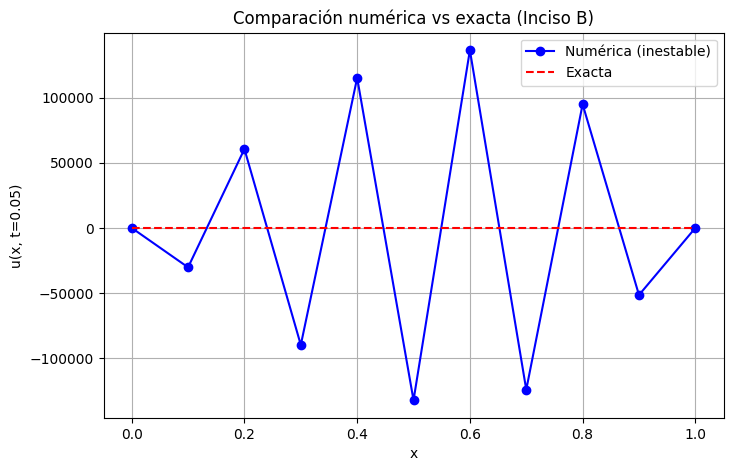

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros
h = 0.1         # paso espacial
k = 0.01        # paso temporal (grande -> inestable)
x = np.arange(0, 1 + h, h)
t_final = 0.5  # tiempo final
t_values = np.arange(0, t_final + k, k)

r = k / h**2
print(f"Coeficiente de estabilidad r = {r}")

# Condición inicial
u = np.sin(np.pi * x)
u[0] = 0
u[-1] = 0

# Guardamos resultados para la tabla
resultados = [u.copy()]

# Iteraciones temporales (método explícito)
for n in range(1, len(t_values)):
    u_new = u.copy()
    for i in range(1, len(x)-1):
        u_new[i] = u[i] + r*(u[i+1] - 2*u[i] + u[i-1])
    u = u_new.copy()
    resultados.append(u.copy())

# Crear tabla como la de la imagen
columnas = [f"x={xi:.1f}" for xi in x]
filas = [f"t={ti:.4f}" for ti in t_values]
tabla = pd.DataFrame(resultados, columns=columnas, index=filas)
pd.set_option('display.precision', 6)
display(tabla)

# Solución exacta en el último tiempo
u_exact = np.exp(-np.pi**2 * t_final) * np.sin(np.pi * x)

# Gráfica de comparación
plt.figure(figsize=(8,5))
plt.plot(x, resultados[-1], 'o-', color='blue', label='Numérica (inestable)')
plt.plot(x, u_exact, 'r--', label='Exacta')
plt.title('Comparación numérica vs exacta (Inciso B)')
plt.xlabel('x')
plt.ylabel('u(x, t=0.05)')
plt.legend()
plt.grid(True)
plt.show()

***COMENTARIO:***
**El método se vuelve inestable, y los errores numéricos se amplifican en cada iteración, generando picos y oscilaciones que crecen con el tiempo.**
**Por lo tanto, las diferencias entre ambos casos se deben al criterio de estabilidad del método explícito y a la elección inadecuada de los pasos h y k.**